In [1]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [2]:
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [3]:
#grayscaling

def get_grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [4]:
#noise removal

def remove_noise(image):
    return cv2.medianBlur(image,5)

In [5]:
#thresholding

def thresholding(image):
    return cv2.threshold(image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [6]:
#erosion 

def erode(image):
    kernel=np.ones((5,5),uint8)
    return cv2.erode(image,kernel,iterations=1)

In [7]:
#dillation

def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

In [8]:
#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

In [9]:
#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

In [11]:
#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

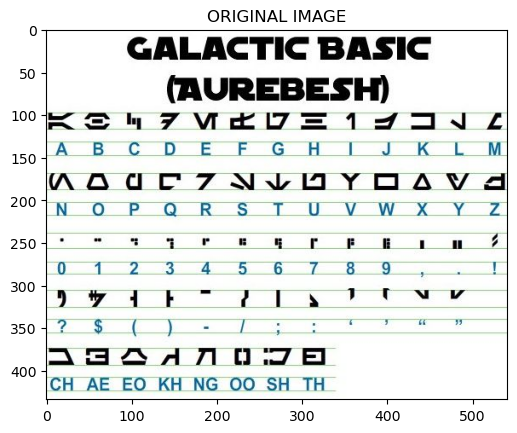

In [12]:
# Plot original image

image = cv2.imread('aurebesh.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('ORIGINAL IMAGE')
plt.show()

In [13]:
# Preprocess image 

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}

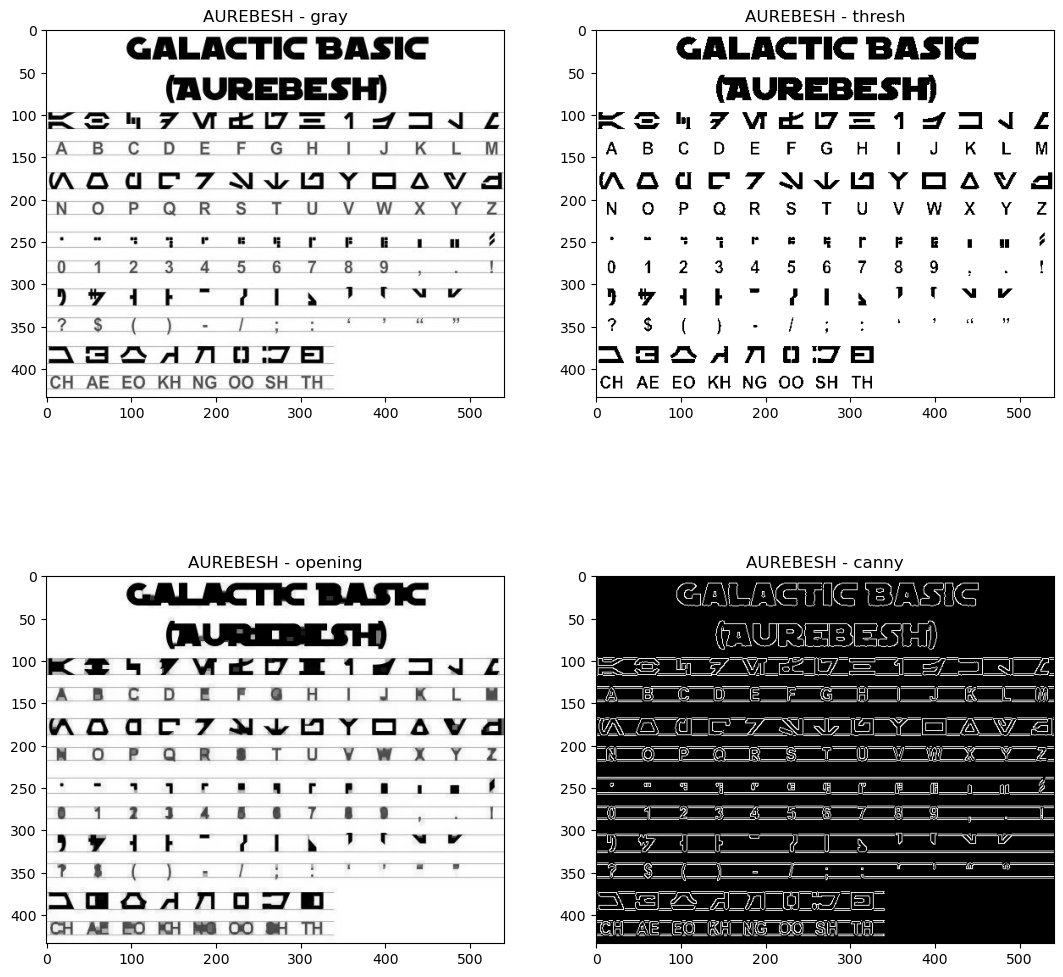

In [14]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')    

In [15]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> GRAY IMAGE')
print('-----------------------------------------')
GRAY_IMAGE=print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> GRAY IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)
RE TFVMVEVE ITZ IoIN.L
AB CUD ET FE GG mn Td KC
AOder7NvToYoAVaA
N_ Oo. 8 _ HG RS Ty wee Ve
a a F< 2
Sy a a a ay Se ae: |
i a a ey ee ee
2 a (a a eS
ASGaSANADI
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)
RE TFVMVEVE ITZ IoIN.L
AB CUD ET FE GG mn Td KC
AOder7NvToYoAVaA
N_ Oo. 8 _ HG RS Ty wee Ve
a a F< 2
Sy a a a ay Se ae: |
i a a ey ee ee
2 a (a a eS
ASGaSANADI
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)
RE TFVMVEVE ITZ IoIN.L
AB CUD ET FE GG mn Td KC
AOder7NvToYoAVaA
N_ Oo. 8 _ HG RS Ty wee Ve
a a F< 2
Sy a a a ay Se ae: |
i a a ey ee ee
2 a (a a eS
ASGaSANADI
CH AE EO KH NG OO SH TH


-------

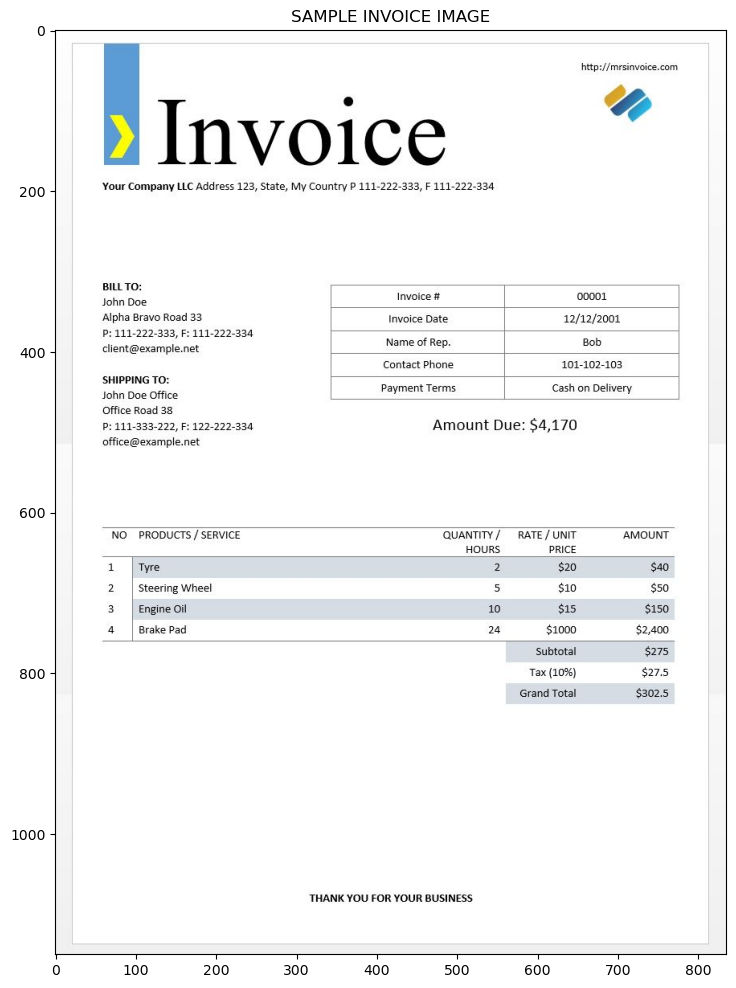

In [16]:
# Plot original image

image = cv2.imread('invoice-sample.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE IMAGE')
plt.show()

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


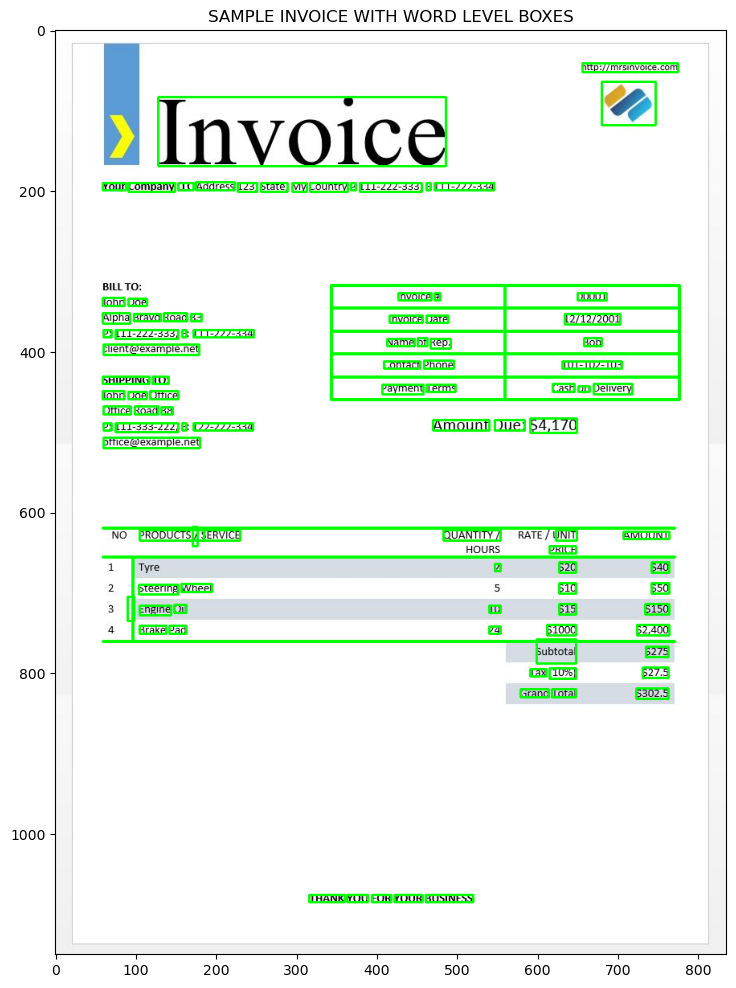

In [17]:
# Plot word boxes on image using pytesseract.image_to_data() function

image = cv2.imread('invoice-sample.jpg')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 60%
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH WORD LEVEL BOXES')
plt.show()